In [176]:
import math

import matplotlib.pyplot as plt
import pandas as pd

In [177]:
# path to the arbitrage csv
DATA_PATH = "../../../../HFTT_Data/Mar_2025/2025-03-03_arbs.csv"

CURRENCIES = {"USD", "EUR", "JPY", "GBP", "CNH", "AUD", "CAD", "CHF", "HKD", "SGD"}

In [178]:
# load the data
df = pd.read_csv(DATA_PATH)

df

,Profit,Cycle,Timestamp,Base to USD
0,1.00003,GBP HKD,1740960006,1.259960
1,1.00000,JPY HKD,1740960007,NaN
2,1.00005,JPY HKD,1740960009,NaN
3,1.00006,JPY HKD,1740960010,NaN
4,1.00000,JPY HKD,1740960013,NaN
...,...,...,...,...
35714,1.00024,CNH JPY USD,1741046395,0.136909
35715,1.00024,CNH JPY USD,1741046396,0.136908
35716,1.00024,CNH JPY USD,1741046397,0.136908
35717,1.00024,CNH JPY USD,1741046398,0.136908


In [179]:
# convert profit and base to usd to floats
df["Profit"] = df["Profit"].astype(float)
df["Base to USD"] = df["Base to USD"].astype(float)

# convert the cycle to a list of symbols and store base currency
df["Cycle"] = df["Cycle"].str.split()
df["Base Currency"] = df["Cycle"].apply(lambda i: i[0])
df["Cycle Length"] = df["Cycle"].apply(lambda i: len(i))

df

,Profit,Cycle,Timestamp,Base to USD,Base Currency,Cycle Length
0,1.00003,"[GBP, HKD]",1740960006,1.259960,GBP,2
1,1.00000,"[JPY, HKD]",1740960007,NaN,JPY,2
2,1.00005,"[JPY, HKD]",1740960009,NaN,JPY,2
3,1.00006,"[JPY, HKD]",1740960010,NaN,JPY,2
4,1.00000,"[JPY, HKD]",1740960013,NaN,JPY,2
...,...,...,...,...,...,...
35714,1.00024,"[CNH, JPY, USD]",1741046395,0.136909,CNH,3
35715,1.00024,"[CNH, JPY, USD]",1741046396,0.136908,CNH,3
35716,1.00024,"[CNH, JPY, USD]",1741046397,0.136908,CNH,3
35717,1.00024,"[CNH, JPY, USD]",1741046398,0.136908,CNH,3


In [180]:
# use a later exchange rate for base to usd if that value is NaN
last_seen_values = {}

# Iterate through the DataFrame in reverse order
for index in reversed(df.index):
    id_value = df.loc[index, 'Base Currency']
    value_value = df.loc[index, 'Base to USD']

    # If a value is found, store it in the dictionary
    if pd.notna(value_value):
        last_seen_values[id_value] = value_value
    # If the value is missing, try to fill it with the last seen value
    elif id_value in last_seen_values:
        df.loc[index, 'Base to USD'] = last_seen_values[id_value]

df["USD Adjusted Profit"] = (df["Profit"] - 1) * df["Base to USD"]

df

,Profit,Cycle,Timestamp,Base to USD,Base Currency,Cycle Length,USD Adjusted Profit
0,1.00003,"[GBP, HKD]",1740960006,1.259960,GBP,2,3.779880e-05
1,1.00000,"[JPY, HKD]",1740960007,0.006626,JPY,2,0.000000e+00
2,1.00005,"[JPY, HKD]",1740960009,0.006626,JPY,2,3.313150e-07
3,1.00006,"[JPY, HKD]",1740960010,0.006626,JPY,2,3.975780e-07
4,1.00000,"[JPY, HKD]",1740960013,0.006626,JPY,2,0.000000e+00
...,...,...,...,...,...,...,...
35714,1.00024,"[CNH, JPY, USD]",1741046395,0.136909,CNH,3,3.285816e-05
35715,1.00024,"[CNH, JPY, USD]",1741046396,0.136908,CNH,3,3.285792e-05
35716,1.00024,"[CNH, JPY, USD]",1741046397,0.136908,CNH,3,3.285792e-05
35717,1.00024,"[CNH, JPY, USD]",1741046398,0.136908,CNH,3,3.285792e-05


In [181]:
# filter out rows with a profit of 1 since those are useless
df = df[df["Profit"] > 1.0]

df

,Profit,Cycle,Timestamp,Base to USD,Base Currency,Cycle Length,USD Adjusted Profit
0,1.00003,"[GBP, HKD]",1740960006,1.259960,GBP,2,3.779880e-05
2,1.00005,"[JPY, HKD]",1740960009,0.006626,JPY,2,3.313150e-07
3,1.00006,"[JPY, HKD]",1740960010,0.006626,JPY,2,3.975780e-07
5,1.00003,"[JPY, HKD]",1740960014,0.006626,JPY,2,1.987890e-07
6,1.00004,"[JPY, HKD]",1740960015,0.006626,JPY,2,2.650520e-07
...,...,...,...,...,...,...,...
35714,1.00024,"[CNH, JPY, USD]",1741046395,0.136909,CNH,3,3.285816e-05
35715,1.00024,"[CNH, JPY, USD]",1741046396,0.136908,CNH,3,3.285792e-05
35716,1.00024,"[CNH, JPY, USD]",1741046397,0.136908,CNH,3,3.285792e-05
35717,1.00024,"[CNH, JPY, USD]",1741046398,0.136908,CNH,3,3.285792e-05


In [182]:
df[["Profit", "Cycle Length", "USD Adjusted Profit"]].describe()

,Profit,Cycle Length,USD Adjusted Profit
count,31327.000000,31327.000000,3.132700e+04
mean,1.000063,2.558560,3.892517e-05
std,0.000093,0.745334,7.263745e-05
min,1.000010,2.000000,6.608800e-08
25%,1.000020,2.000000,1.285730e-06
50%,1.000040,2.000000,1.270430e-05
75%,1.000080,3.000000,4.828152e-05
max,1.002820,8.000000,1.955952e-03


In [183]:
# count the number of arbs that originate at each currency
bases = {}
for i in df["Base Currency"]:
    bases[i] = bases.get(i, 0) + 1

bases

{'GBP': 2140,
 'JPY': 8180,
 'HKD': 3150,
 'USD': 2625,
 'AUD': 2485,
 'CAD': 3559,
 'EUR': 1874,
 'SGD': 948,
 'CHF': 6231,
 'CNH': 135}

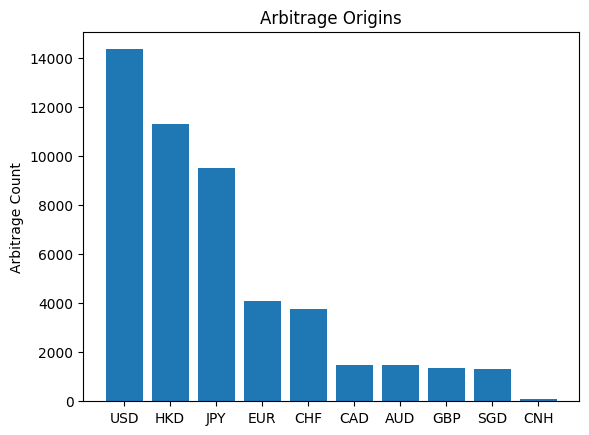

In [199]:
# plot the number of arbs starting/ending in each currency
currs = [i[0] for i in sorted(bases.items(), key=lambda i: i[1], reverse=True)]
cycles = [i for i in sorted(bases.values(), reverse=True)]
plt.bar(currs, cycles)
plt.title("Arbitrage Origins")
plt.ylabel("Arbitrage Count")
plt.show()

In [185]:
# count the number of times each base was traded through
bases = {}
for i in df["Cycle"]:
    for c in i[1:]:
        bases[c] = bases.get(c, 0) + 1

bases

{'HKD': 11329,
 'USD': 14369,
 'JPY': 9515,
 'GBP': 1372,
 'AUD': 1466,
 'CAD': 1489,
 'EUR': 4109,
 'CHF': 3766,
 'SGD': 1318,
 'CNH': 92}

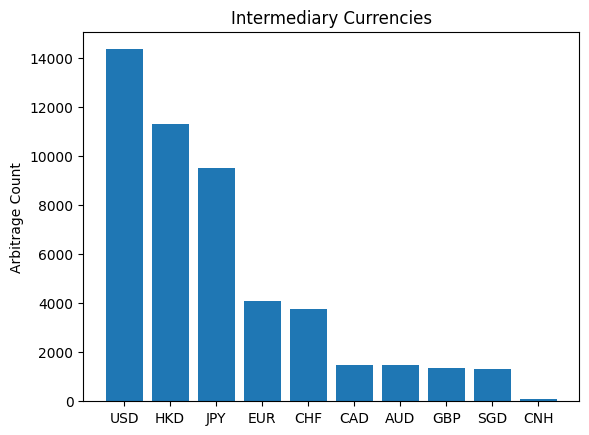

In [200]:
# plot the number of arbs trading through each currency
currs = [i[0] for i in sorted(bases.items(), key=lambda i: i[1], reverse=True)]
cycles = [i for i in sorted(bases.values(), reverse=True)]
plt.bar(currs, cycles)
plt.title("Intermediary Currencies")
plt.ylabel("Arbitrage Count")
plt.show()

In [187]:
# count the number of arb opportunities at each profit level
profits = {}
for i in df["Profit"]:
    profits[i] = profits.get(i, 0) + 1

profits

{1.00003: 3659,
 1.00005: 2291,
 1.00006: 1628,
 1.00004: 2701,
 1.00015: 353,
 1.00014: 372,
 1.00001: 6858,
 1.00002: 4595,
 1.00007: 1472,
 1.00009: 1051,
 1.0001: 822,
 1.00008: 1140,
 1.00013: 547,
 1.00011: 772,
 1.00012: 617,
 1.00021: 143,
 1.00016: 287,
 1.00017: 269,
 1.00027: 53,
 1.00028: 53,
 1.00024: 90,
 1.00026: 64,
 1.0003: 39,
 1.00022: 109,
 1.00018: 189,
 1.00019: 218,
 1.00023: 105,
 1.00031: 42,
 1.00032: 30,
 1.00034: 35,
 1.00033: 39,
 1.00035: 32,
 1.00029: 52,
 1.0002: 167,
 1.00025: 85,
 1.00036: 34,
 1.00044: 9,
 1.00053: 10,
 1.00042: 12,
 1.00056: 11,
 1.0006: 3,
 1.00061: 5,
 1.00057: 3,
 1.00049: 5,
 1.00052: 6,
 1.00047: 8,
 1.00175: 1,
 1.00041: 22,
 1.00046: 6,
 1.00038: 10,
 1.00043: 11,
 1.00045: 7,
 1.00039: 12,
 1.00063: 7,
 1.00037: 19,
 1.0004: 12,
 1.00048: 13,
 1.00106: 1,
 1.00064: 3,
 1.00066: 3,
 1.00055: 4,
 1.0005: 2,
 1.00058: 7,
 1.00067: 2,
 1.00118: 1,
 1.00096: 2,
 1.0009: 3,
 1.00093: 3,
 1.00098: 2,
 1.00071: 2,
 1.00054: 4,
 1.000

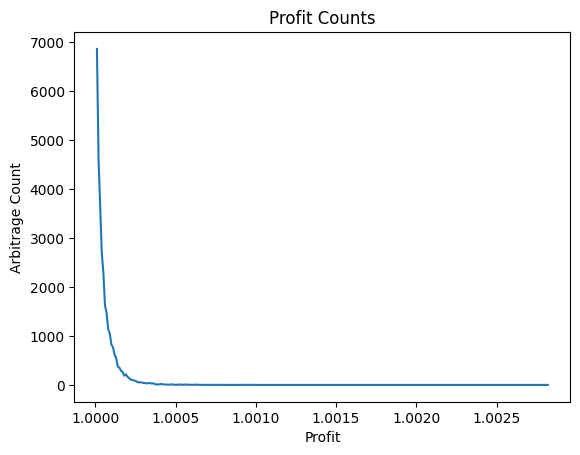

In [201]:
# plot the arb profits
ps = [i for i in sorted(profits)]
counts = [profits[i] for i in ps]

plt.plot(ps, counts)
plt.title("Profit Counts")
plt.ylabel("Arbitrage Count")
plt.xlabel("Profit")
plt.show()

In [ ]:
# count all arbs passing through each currency and sum profit
curr_counts = {i: {"count": 0, "total_profit": 0.0} for i in CURRENCIES}
for profit, cycle in zip(df["Profit"], df["Cycle"]):
    for c in cycle:
        curr_counts[c]["count"] += 1
        curr_counts[c]["total_profit"] += profit

curr_counts

{'SGD': {'count': 2266, 'total_profit': 2266.1545199999814},
 'HKD': {'count': 14479, 'total_profit': 14479.849689999422},
 'JPY': {'count': 17695, 'total_profit': 17696.153669998992},
 'GBP': {'count': 3512, 'total_profit': 3512.171650000028},
 'CHF': {'count': 9997, 'total_profit': 9997.77785999995},
 'USD': {'count': 16994, 'total_profit': 16994.920579998794},
 'EUR': {'count': 5983, 'total_profit': 5983.339110000041},
 'AUD': {'count': 3951, 'total_profit': 3951.2690700000335},
 'CNH': {'count': 227, 'total_profit': 227.0195300000002},
 'CAD': {'count': 5048, 'total_profit': 5048.370740000032}}

Text(0, 0.5, 'Average Profit')

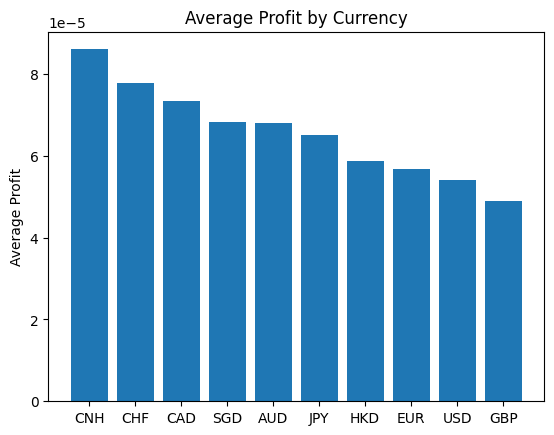

In [203]:
# plot average profit for arbs containing each currency
currs = [c[0] for c in sorted(curr_counts.items(), key=lambda i: i[1]["total_profit"]/i[1]["count"], reverse=True)]
avg_profits = [curr_counts[i]["total_profit"]/curr_counts[i]["count"] - 1 for i in currs]

plt.bar(currs, avg_profits)
plt.title("Average Profit by Currency")
plt.ylabel("Average Profit")

There are 2 types of forex trading accounts: commission free spread trading and commission based raw spread trading.

Our data aligns much more with a raw spread since it's tight with no bid/ask spread and thus it makes more sense to account for fees based on a commission approach.

Generally, these commission accounts range from $2-10 per $100k volume (according to fxverify.com). So, let's take a look at the kind of volume we'd need to trade to make money on these arbitrage opportunities.

In [228]:
# list of fees per lot from $2-10
increment = 20
fees = [i / increment for i in range(2 * increment, 10 * increment + 1)]

In [229]:
# count the number of profitable arbitrage opportunities by fee
arbs_by_fee = {i: 0 for i in fees}
for profit, cycle_len in zip(df["Profit"], df["Cycle Length"]):
    for fee in fees:
        if profit - (fee / 10**5) * cycle_len > 1.0:
            arbs_by_fee[fee] += 1

arbs_by_fee

{2.0: 11604,
 2.05: 11604,
 2.1: 11604,
 2.15: 11604,
 2.2: 11591,
 2.25: 11533,
 2.3: 11533,
 2.35: 11100,
 2.4: 11094,
 2.45: 11094,
 2.5: 9703,
 2.55: 9703,
 2.6: 9697,
 2.65: 9697,
 2.7: 9350,
 2.75: 9308,
 2.8: 9302,
 2.85: 9301,
 2.9: 9301,
 2.95: 9301,
 3.0: 7962,
 3.05: 7962,
 3.1: 7962,
 3.15: 7962,
 3.2: 7960,
 3.25: 7917,
 3.3: 7917,
 3.35: 7647,
 3.4: 7642,
 3.45: 7642,
 3.5: 6725,
 3.55: 6725,
 3.6: 6722,
 3.65: 6722,
 3.7: 6509,
 3.75: 6487,
 3.8: 6485,
 3.85: 6484,
 3.9: 6484,
 3.95: 6484,
 4.0: 5573,
 4.05: 5573,
 4.1: 5573,
 4.15: 5573,
 4.2: 5572,
 4.25: 5549,
 4.3: 5549,
 4.35: 5399,
 4.4: 5399,
 4.45: 5399,
 4.5: 4754,
 4.55: 4754,
 4.6: 4754,
 4.65: 4754,
 4.7: 4633,
 4.75: 4612,
 4.8: 4611,
 4.85: 4610,
 4.9: 4610,
 4.95: 4610,
 5.0: 3991,
 5.05: 3991,
 5.1: 3991,
 5.15: 3991,
 5.2: 3990,
 5.25: 3979,
 5.3: 3979,
 5.35: 3876,
 5.4: 3876,
 5.45: 3876,
 5.5: 3362,
 5.55: 3362,
 5.6: 3362,
 5.65: 3362,
 5.7: 3292,
 5.75: 3284,
 5.8: 3284,
 5.85: 3284,
 5.9: 3284,
 5.

Text(0.5, 0, 'Fee (USD per $100k volume)')

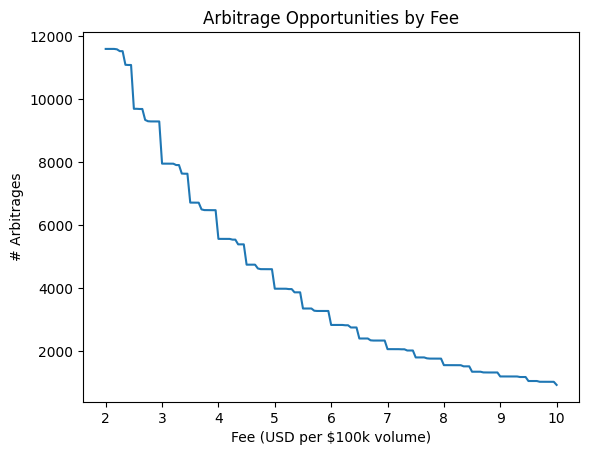

In [230]:
plt.plot(arbs_by_fee.keys(), arbs_by_fee.values())
plt.title("Arbitrage Opportunities by Fee")
plt.ylabel("# Arbitrages")
plt.xlabel("Fee (USD per $100k volume)")

Let's take a look at the most profitable arbitrage opportunities.

In [234]:
df_profit_sort = df.sort_values(by="Profit", ascending=False)
df_profit_sort = df_profit_sort[df_profit_sort["Profit"] > 1.002]

df_profit_sort

,Profit,Cycle,Timestamp,Base to USD,Base Currency,Cycle Length,USD Adjusted Profit
29995,1.00282,"[CAD, SGD, HKD, USD, JPY]",1741027692,0.693600,CAD,5,0.001956
29991,1.00278,"[JPY, CAD]",1741027688,0.006661,JPY,2,0.000019
29996,1.00251,"[CAD, HKD, USD, JPY]",1741027693,0.693470,CAD,4,0.001741
30000,1.00247,"[CAD, USD, JPY]",1741027697,0.693270,CAD,3,0.001712
30001,1.00246,"[JPY, CAD]",1741027698,0.006661,JPY,2,0.000016
29990,1.00243,"[JPY, CAD]",1741027687,0.006661,JPY,2,0.000016
29989,1.00239,"[JPY, CAD]",1741027686,0.006661,JPY,2,0.000016
29994,1.00233,"[JPY, CAD, HKD]",1741027691,0.006661,JPY,3,0.000016
31652,1.00226,"[AUD, CAD]",1741031532,0.623230,AUD,2,0.001408
29999,1.00225,"[HKD, JPY, CAD]",1741027696,0.128598,HKD,3,0.000289


In [235]:
df_profit_sort["Volume to profit 1USD"] = 1 / (df_profit_sort["Profit"] - 1)
df_profit_sort

,Profit,Cycle,Timestamp,Base to USD,Base Currency,Cycle Length,USD Adjusted Profit,Volume to profit 1USD
29995,1.00282,"[CAD, SGD, HKD, USD, JPY]",1741027692,0.693600,CAD,5,0.001956,354.609929
29991,1.00278,"[JPY, CAD]",1741027688,0.006661,JPY,2,0.000019,359.712230
29996,1.00251,"[CAD, HKD, USD, JPY]",1741027693,0.693470,CAD,4,0.001741,398.406375
30000,1.00247,"[CAD, USD, JPY]",1741027697,0.693270,CAD,3,0.001712,404.858300
30001,1.00246,"[JPY, CAD]",1741027698,0.006661,JPY,2,0.000016,406.504065
29990,1.00243,"[JPY, CAD]",1741027687,0.006661,JPY,2,0.000016,411.522634
29989,1.00239,"[JPY, CAD]",1741027686,0.006661,JPY,2,0.000016,418.410042
29994,1.00233,"[JPY, CAD, HKD]",1741027691,0.006661,JPY,3,0.000016,429.184549
31652,1.00226,"[AUD, CAD]",1741031532,0.623230,AUD,2,0.001408,442.477876
29999,1.00225,"[HKD, JPY, CAD]",1741027696,0.128598,HKD,3,0.000289,444.444444
